# Naive Bias

Naive Bayes algoritması, bir sınıflandırma probleminde, bir veri noktasının hangi sınıfa ait olduğunu tahmin etmek için kullanılan bir makine öğrenimi algoritmasıdır. Algoritma, verilerin sınıfı ile ilgili olasılıklarını hesaplar ve daha sonra yeni bir veri noktasının hangi sınıfa ait olduğunu belirlemek için bu olasılıkları kullanır.

Naive Bayes algoritması, birçok uygulama alanında başarılı bir şekilde kullanılmaktadır, özellikle doğal dil işleme (NLP) uygulamalarında sıkça kullanılmaktadır. Örneğin, bir e-postanın spam olup olmadığını belirlemek için veya bir belgenin hangi kategoriye ait olduğunu belirlemek için kullanılabilir.

Çalışma prensibi, Bayes teoremi üzerine kuruludur. Bayes teoremi, bir olayın olasılığını, bu olayın gerçekleştiği koşulların bilinmesine bağlı olarak hesaplar.

Naive Bayes algoritması, sınıfı belirleyen özellikleri bağımsız olarak ele alır. Yani, bir veri noktasının sınıfını belirlemek için, sınıfı belirleyen özelliklerin bir arada bağımsız olarak hesaplanmasını gerektirir. Bu bağımsızlık varsayımı, "naive" olarak adlandırılır, çünkü gerçekte bağımsızlık tam olarak geçerli olmayabilir.

Bir örnek vermek gerekirse, bir e-postanın spam olup olmadığını belirlemek için, e-postadaki belirli kelimelerin varlığı ve yokluğu gibi belirli özellikler göz önünde bulundurulabilir. Algoritma, bu kelimelerin her birinin spam e-posta veya normal e-posta içinde görülme olasılıklarını hesaplar. Daha sonra, yeni bir e-posta geldiğinde, algoritma, bu kelimelerin varlığına veya yokluğuna dayanarak e-postanın spam olup olmadığını belirlemeye çalışır.

Örneğin, bir e-posta şu kelimeleri içeriyorsa: "kazanan", "ödül", "şans", "kredi kartı", "banka hesabı", Naive Bayes algoritması, bu kelimelerin spam e-postalarda ne kadar yaygın olduğunu ve normal e-postalarda ne kadar yaygın olduğunu hesaplayacaktır. Eğer bu kelimelerin spam e-postalarında daha sık görüldüğü ortaya çıkarsa, algoritma bu e-postayı spam olarak sınıflandırabilir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(["Unnamed: 32", "id"],axis=1, inplace=True)

In [5]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
M = data[data.diagnosis== "M"]

In [8]:
B= data[data.diagnosis== "B"]

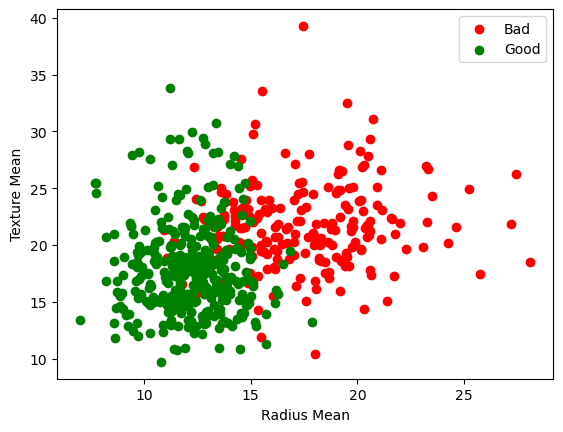

In [10]:
plt.scatter(M.radius_mean, M.texture_mean, label= "Bad", color="r")
plt.scatter(B.radius_mean, B.texture_mean, label= "Good", color="g")
plt.legend()
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()

In [11]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)
y= data.diagnosis.values
x_data= data.drop(["diagnosis"],axis=1)

In [12]:
x= (x_data-np.min(x_data))/np.max(x_data)-(np.min(x_data))

D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=42)

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb= GaussianNB()

In [17]:
nb.fit(x_train, y_train)

GaussianNB()

In [18]:
print("Print acuracy of Nb algorithm: {}".format(nb.score(x_test,y_test)))

Print acuracy of Nb algorithm: 0.935672514619883
